In [25]:
# Dependencies and Setup
# Water consumption
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [26]:
# File to Load
path = Path("Resources/austin_water.csv")
customer_data_df = pd.read_csv(path)
customer_data_df

,Year Month,Postal Code,Customer Class,Total Gallons
0,201201,78613,Irrigation - Multi-Family,11000
1,201201,78613,Multi-Family,23000
2,201201,78617,Residential,19840800
3,201201,78617,Multi-Family,2477000
4,201201,78652,Irrigation - Residential,38500
...,...,...,...,...
16815,202009,78758,Multi-Family,57603300
16816,202009,78759,Irrigation - Residential,114500
16817,202009,78759,Multi-Family,45024600
16818,202009,78759,Irrigation - Multi-Family,3684700


In [27]:
#Filtering data to only include relevant month and year
customer_data_df['Year Month'] = pd.to_datetime(customer_data_df['Year Month'], format='%Y%m')
filtered_data = customer_data_df[(customer_data_df['Year Month'].dt.year >= 2013) & (customer_data_df['Year Month'].dt.year <= 2017)]
filtered_data




,Year Month,Postal Code,Customer Class,Total Gallons
1850,2013-01-01,78613,Irrigation - Multi-Family,15000
1851,2013-01-01,78613,Multi-Family,20000
1852,2013-01-01,78617,Irrigation - Residential,200
1853,2013-01-01,78617,Residential,21866800
1854,2013-01-01,78617,Multi-Family,2920900
...,...,...,...,...
11397,2017-12-01,78758,Irrigation - Residential,40000
11398,2017-12-01,78759,Irrigation - Multi-Family,996500
11399,2017-12-01,78759,Multi-Family,34477800
11400,2017-12-01,78759,Irrigation - Residential,51500


In [28]:
#Grouping the data by zip code and calculate the total gallons consumed
#zip_code_totals = filtered_data.groupby(['Postal Code', 'Year Month'])['Total Gallons'].sum()
zip_code_totals = filtered_data.groupby(['Postal Code'])['Total Gallons'].sum()
time_totals = filtered_data.groupby(['Year Month'])['Total Gallons'].sum()


#Sorting the postal codes in descending order
sorted_zip_codes = zip_code_totals.sort_values(ascending=False)
sorted_zip_codes

Postal Code
78745    6594121600
78759    6447478500
78753    6211714600
78704    5988662900
78741    5948542900
78748    5772959200
78758    5450300400
78731    5074019500
78749    5032387200
78744    4676178400
78750    4329367300
78703    4093578900
78727    3807507000
78723    3439342500
78746    3312568400
78717    3105753100
78757    2916096700
78729    2815297800
78705    2749381300
78739    2727112000
78754    2442129700
78702    2266008500
78726    2118635000
78735    2022458600
78747    1991555500
78724    1984994900
78752    1938386100
78751    1767045900
78730    1688955000
78617    1424622600
78721    1119279400
78736    1054126100
78756    1048822400
78701     981504500
78728     858839500
78722     675216600
78660     604205300
78737     517396300
78725     172066500
78613     147379600
78719     123973900
78652     117449500
78653      85421200
78742      62116900
78738        385000
78712             0
Name: Total Gallons, dtype: int64

In [29]:
#Zip codes with the highest total monthly water consumption
top_10_zip = sorted_zip_codes.head(10)
print(top_10_zip)

Postal Code
78745    6594121600
78759    6447478500
78753    6211714600
78704    5988662900
78741    5948542900
78748    5772959200
78758    5450300400
78731    5074019500
78749    5032387200
78744    4676178400
Name: Total Gallons, dtype: int64


In [30]:
#Sorted time totals
sorted_time= time_totals.sort_values(ascending=False)
sorted_time


Year Month
2015-08-01    2763112500
2015-09-01    2684620600
2013-09-01    2593170700
2014-09-01    2564459200
2017-08-01    2547847000
2013-08-01    2534850100
2013-07-01    2491107800
2016-08-01    2470237400
2017-07-01    2466226200
2016-07-01    2415686400
2015-10-01    2401311400
2014-08-01    2358940000
2017-09-01    2353679000
2016-09-01    2156562700
2014-07-01    2134472900
2016-10-01    2107208900
2013-06-01    2104754100
2017-06-01    2098386200
2015-07-01    2033398200
2013-05-01    2019089400
2017-10-01    2018448000
2013-10-01    2017698100
2014-06-01    2005111400
2014-05-01    1985723400
2017-05-01    1979500400
2016-11-01    1947654300
2014-11-01    1945344400
2013-01-01    1907330000
2014-10-01    1904262000
2013-04-01    1875674700
2017-11-01    1867682000
2016-06-01    1856758200
2015-11-01    1849563900
2014-04-01    1779458600
2015-01-01    1776078100
2016-04-01    1770805400
2014-01-01    1761888000
2016-12-01    1761018500
2017-01-01    1754559800
2013-03-01    

In [31]:
#Top 10 Year Month
top_10_time = sorted_time.head(10)
print(top_10_zip)

Postal Code
78745    6594121600
78759    6447478500
78753    6211714600
78704    5988662900
78741    5948542900
78748    5772959200
78758    5450300400
78731    5074019500
78749    5032387200
78744    4676178400
Name: Total Gallons, dtype: int64


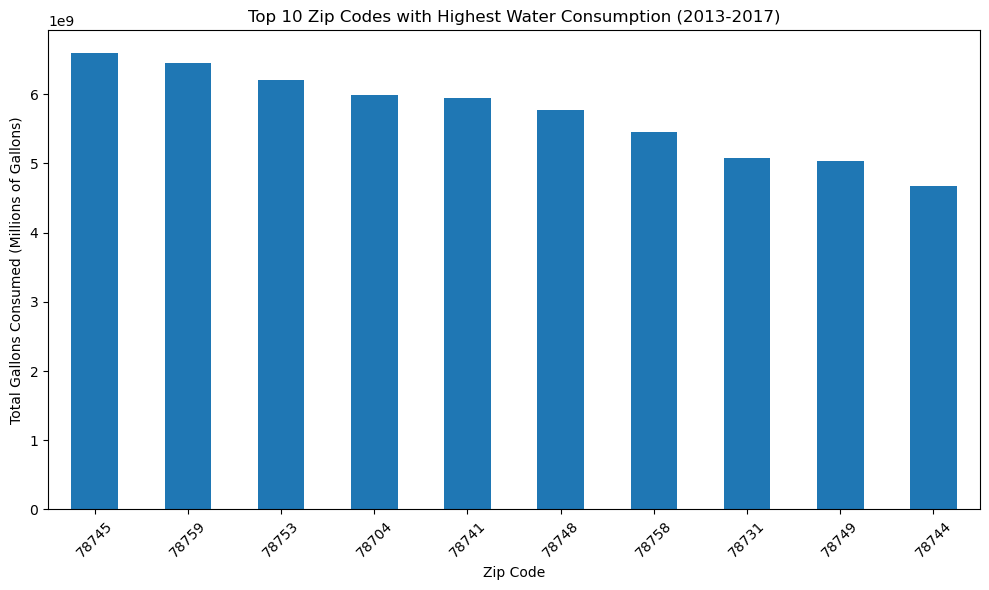

In [32]:
# Create a bar graph
plt.figure(figsize=(10, 6))
top_10_zip.plot(kind='bar', color = "#2E6D4F")
plt.xlabel('Zip Code')
plt.ylabel('Total Gallons Consumed (Millions of Gallons)')
plt.title('Top 10 Zip Codes with Highest Water Consumption (2013-2017)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



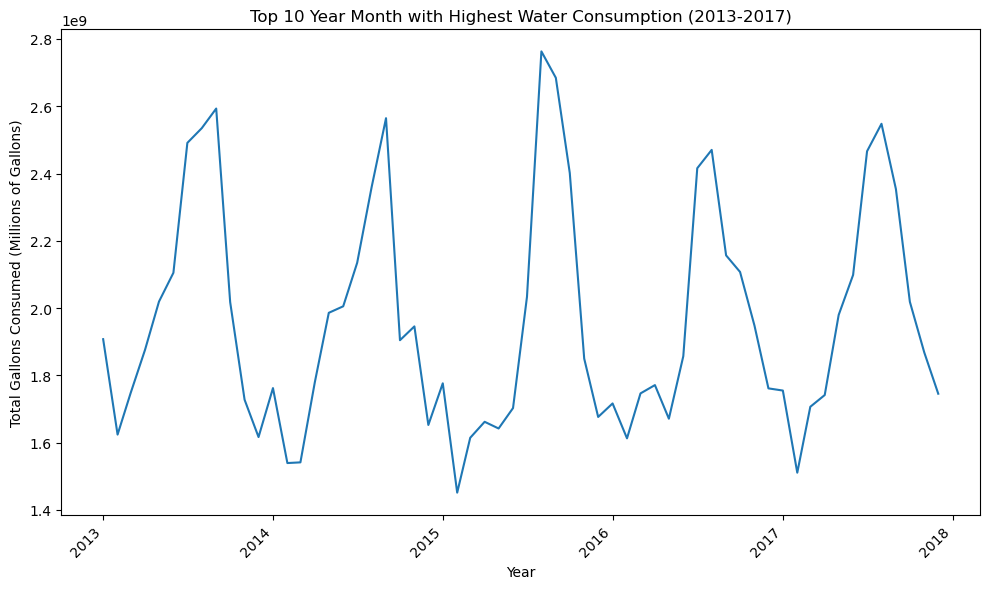

In [33]:
#Create line graph
# Create a bar graph
plt.figure(figsize=(10, 6))
sorted_time.plot(kind='line', color = "#2E6D4F")
plt.xlabel('Year')
plt.ylabel('Total Gallons Consumed (Millions of Gallons)')
plt.title('Top 10 Year Month with Highest Water Consumption (2013-2017)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


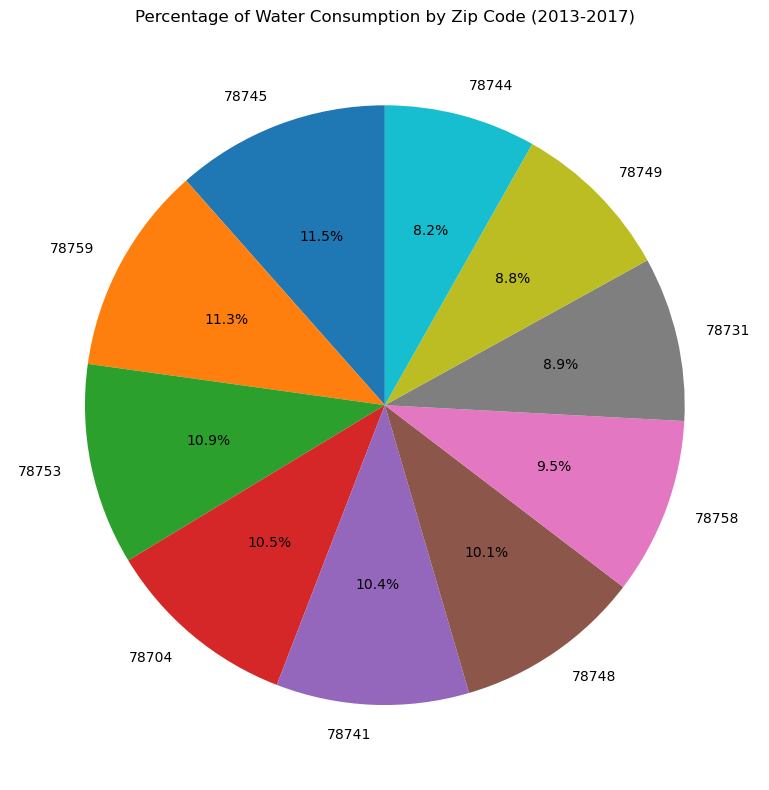

In [34]:
#Creat a pie chart
plt.figure(figsize=(8, 8))
top_10_zip.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Percentage of Water Consumption by Zip Code (2013-2017)')
plt.tight_layout()
plt.show()